In [49]:
import os,sys
import pandas as pd

In [50]:
sys.path.append("../")


In [51]:
from scripts.data_loader import load_data

df =load_data("../data/AAPL_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [52]:
from scripts.data_analyzer import calculate_rsi

# Simple Moving Average over 7 days
df['SMA_7'] = df['Close'].rolling(window=7).mean()

# Exponential Moving Average over 7 days
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()

# Relative Strength Index over 7 days
df['RSI_7'] = calculate_rsi(df['Close'])

#Moving Average Convergence Divergence 
short_ema = df['Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = short_ema - long_ema
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


df.head(20)



,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_7,EMA_7,RSI_7,MACD,Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,0.128348,NaN,0.000000,0.000000
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,0.126674,NaN,-0.000534,-0.000107
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,0.123186,NaN,-0.001659,-0.000417
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,0.121268,NaN,-0.002299,-0.000793
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,0.120666,NaN,-0.002506,-0.001136
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,NaN,0.122029,NaN,-0.002062,-0.001321
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,0.122210,0.124585,55.555256,-0.001201,-0.001297
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,0.123565,0.127898,61.644213,-0.000067,-0.001051
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,0.126913,0.132195,78.377529,0.001401,-0.000561
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,0.133450,0.138767,100.000000,0.003603,0.000272


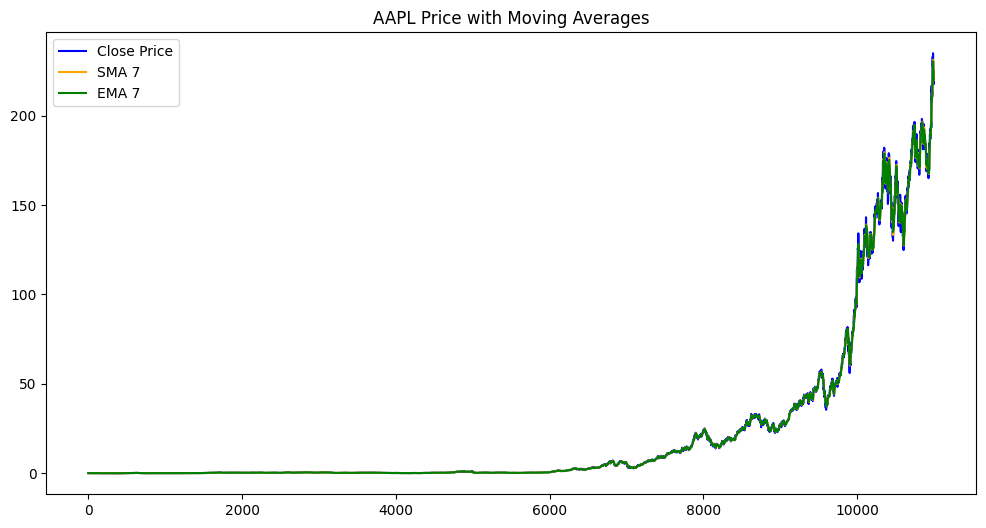

In [53]:
import matplotlib.pyplot as plt

# Plot Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Close Price", color="blue")
plt.plot(df['SMA_7'], label="SMA 7", color="orange")
plt.plot(df['EMA_7'], label="EMA 7", color="green")
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.show()

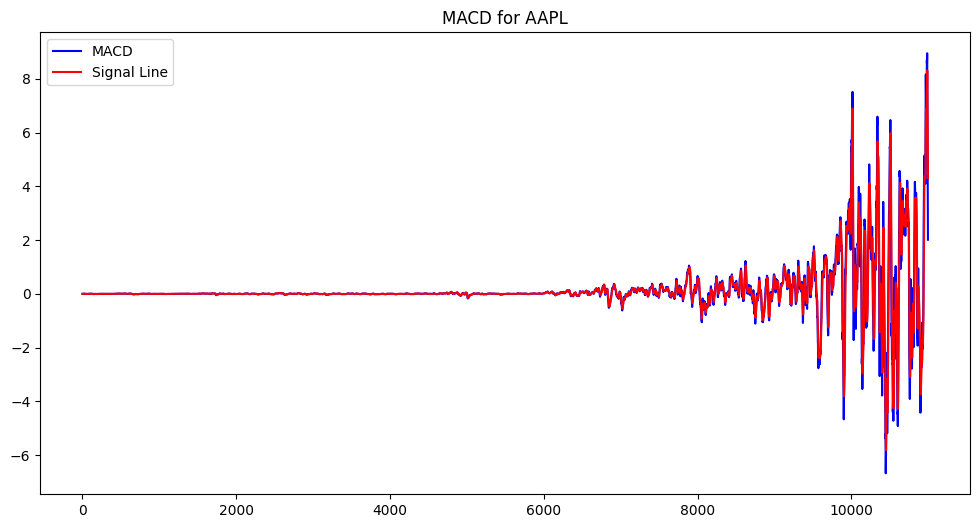

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df['MACD'], label="MACD", color="blue")
plt.plot(df['Signal'], label="Signal Line", color="red")
plt.title("MACD for AAPL")
plt.legend()
plt.show()

# Task 03

In [65]:

from scripts.data_analyzer import convert_mixed_datetime
from textblob import TextBlob

df_headline =load_data("../data/raw_analyst_ratings.csv")
df_headline = df_headline[df_headline['stock'] == 'AAPL']  # filter only Apple related rows from headline dataset
df_headline["date"] = df_headline["date"].apply(convert_mixed_datetime) # groom the format inconsistency in the date column and pick only date part of it
df_headline['sentiment_polarity'] = df_headline['headline'].apply(lambda x: TextBlob(x).sentiment.polarity) # calculate sentiment polarity
df_headline =  df_headline[['date', 'sentiment_polarity', 'stock']]
df_headline.columns = ['Date','sentiment_polarity','stock']
df_headline.head()




,Date,sentiment_polarity,stock
6680,2020-06-10,0.433333,AAPL
6681,2020-06-10,0.000000,AAPL
6682,2020-06-10,0.500000,AAPL
6683,2020-06-10,0.000000,AAPL
6684,2020-06-10,0.000000,AAPL


In [68]:
df['Percentage Change'] = df['Close'].pct_change() * 100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_7,EMA_7,RSI_7,MACD,Signal,Percentage Change
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,0.128348,NaN,0.000000,0.000000,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,0.126674,NaN,-0.000534,-0.000107,-5.217061
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,0.123186,NaN,-0.001659,-0.000417,-7.339788
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,0.121268,NaN,-0.002299,-0.000793,2.475091
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,0.120666,NaN,-0.002506,-0.001136,2.899246


In [64]:
#combined_data = df_headline.set_index('Date').join(df['Close'])
combined_data = pd.merge(df, df_headline, on='Date', how='inner')
#combined_data = pd.merge(df, df_headline, on=['Date', 'Date'], how='inner')

combined_data.head(2000)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_7,EMA_7,RSI_7,MACD,Signal,sentiment_polarity,stock


In [69]:
import seaborn as sns

corr_matrix=df[['sentiment_polarity','Close']].corr()
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm')
plt.title("Correlation between sentiment_polarity and stock price")
plt.show()

ModuleNotFoundError: No module named 'seaborn'